# Libraries required for data manupulation, visualization and modeling


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split as tts, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_auc_score,precision_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [2]:
dataset_train = pd.read_csv("Ins_Claims_train.csv")

In [3]:
dataset_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


### Checking Size, Data Type and Null Values

In [4]:
dataset_train.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [5]:
dataset_train.shape

(50553, 12)

In [6]:
dataset_train.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [7]:
#Checking the percentage of NULL values
(dataset_train.isnull().sum()/dataset_train.shape[0])*100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [8]:
#Gender column has more than 70% NULL values we can delete the column for replace with some other values
dataset_train['Gender']=dataset_train["Gender"].fillna("Not Present")

### Since we can't judge whether to give claim or not bases of ID hence dropping

In [9]:
# Dropping ID column 
dataset_train.drop(['ID'],1,inplace=True)

## Data Visualization

### Airline Agency type has higher number of Accepted Claims also having high Commision value involved which is logically understandable.

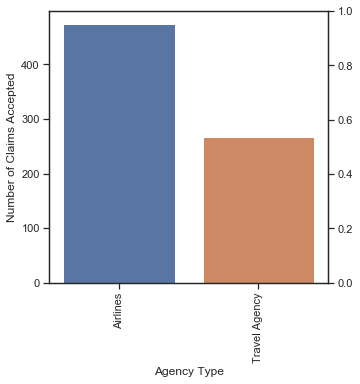

In [48]:
table1=pd.crosstab(dataset_train["Agency Type"],dataset_train["Claim"])
#table1['mean commision']=new_dataset_train.groupby('Agency Type')['Commision (in value)'].mean()
table1.head()

fig,ax1=plt.subplots(figsize=(5,5))
sns.barplot(table1.index,table1[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
#sns.scatterplot(table1.index,table1['mean commision'],ax=ax2,color="red",s=100)

### Offline Distribution Channel has really really low Number of Claims accepted as compared to Online.

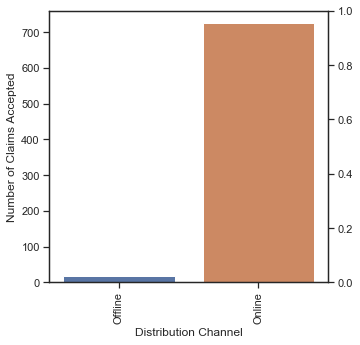

In [50]:
table2=pd.crosstab(dataset_train["Distribution Channel"],dataset_train["Claim"])
#table2['mean commision']=dataset_train.groupby('Distribution Channel')['Commision (in value)'].mean()
table2.head()

fig,ax1=plt.subplots(figsize=(5,5))
sns.barplot(table2.index,table2[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
#sns.scatterplot(table2.index,table2['mean commision'],ax=ax2,color="red",s=100)

### Duration having values greater than 364+ have better Claim Acceptance rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

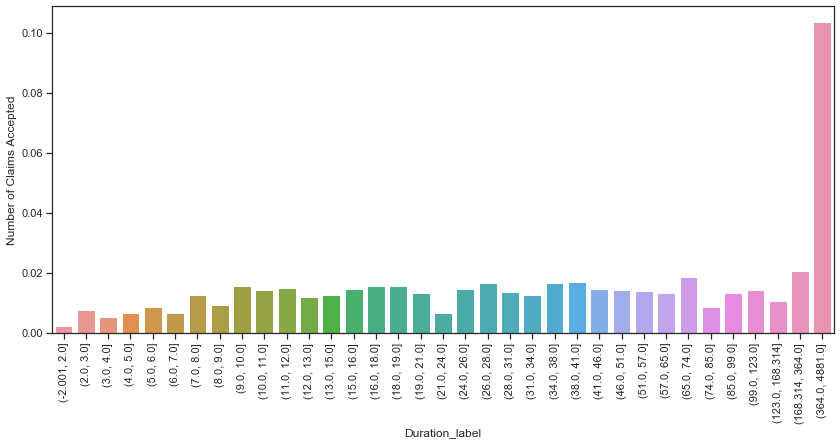

In [58]:
dataset_train['Duration_label']=pd.qcut(dataset_train['Duration'],q=35)
table4=pd.crosstab(dataset_train['Duration_label'],dataset_train['Claim'],normalize='index')

plt.figure(figsize=(14,6))
sns.barplot(table4.index,table4[1])
plt.ylabel("Number of Claims Accepted")
plt.xticks(rotation=90)

### Number of Claims accepted are higher for Age group 30 to 44 followed by Age group 15 to 29. Commision incorporated for all Age groups is comparitivley similar.

Claim,0,1,mean commision
Age_Binned,,,
"(0, 15]",67,1,10.760000
"(15, 30]",6982,212,12.266628
"(30, 45]",31553,364,7.201804
"(45, 60]",8171,116,15.512406
"(60, 120]",3037,48,16.186337


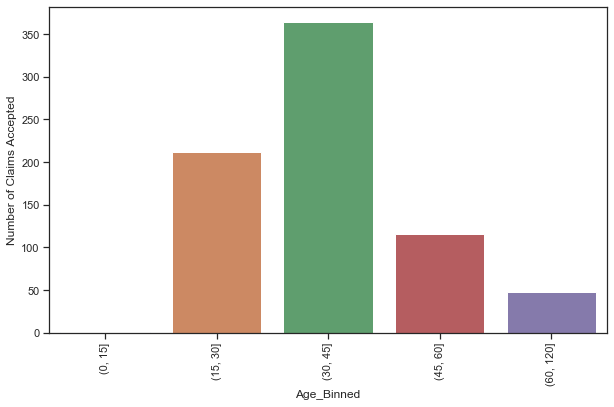

In [59]:
bins = [0, 15, 30, 45, 60, 120]
dataset_train["Age_Binned"] = pd.cut(dataset_train['Age'], bins)

table5=pd.crosstab(dataset_train["Age_Binned"],dataset_train["Claim"])
table5['mean commision']=dataset_train.groupby('Age_Binned')['Commision (in value)'].mean()
table5

fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(table5.index,table5[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")

table5

### Singapore is having good Claim Acceptance number with descent commion. Where as United States, Australia and United Kingdom doesn't show great Claim Acceptance Number but still have high Commision Rate

Claim,0,1,mean commision
Destination,,,
SINGAPORE,10158,450,13.121358
CHINA,3802,34,4.654025
UNITED STATES,1988,30,21.801943
THAILAND,4670,29,5.504373
AUSTRALIA,2906,28,25.888504
MALAYSIA,4726,21,6.338300
HONG KONG,1927,15,2.973563
UNITED KINGDOM,1027,13,19.957615
"KOREA, REPUBLIC OF",1169,13,4.643452


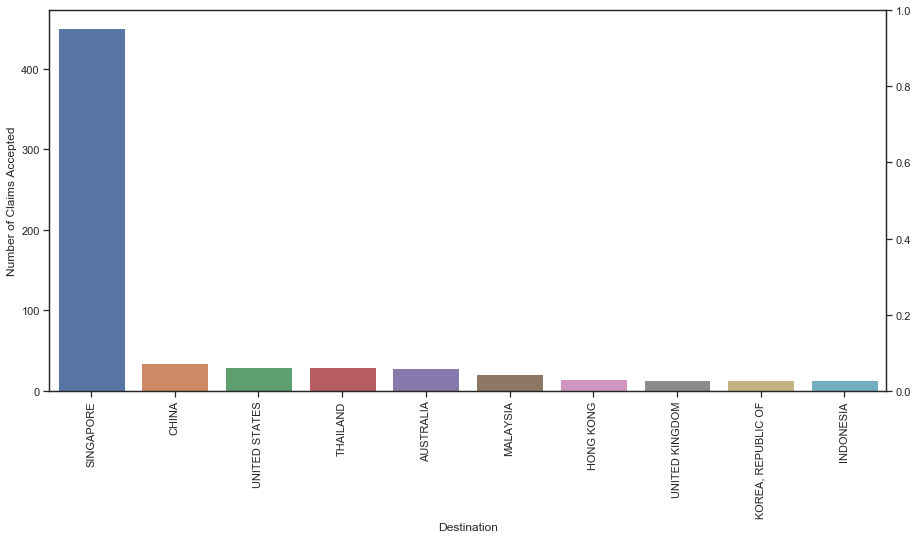

In [63]:
net_table2=pd.crosstab(dataset_train["Destination"],dataset_train["Claim"])
net_table2['Mean Net Sales']=dataset_train.groupby('Destination')['Net Sales'].mean()
net_table2=net_table2.sort_values(by=1,ascending=False).head(10)

fig,ax1=plt.subplots(figsize=(15,7))
sns.barplot(table6.index,table6[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
table6

### Few plans like Child Comprehensive Plan, Indivisual Comprehensive Plan, Silver Plan, Spouse or Parents Comprehensive Plan shows increase in Average Net Sales yet considerable dip in average Commision value

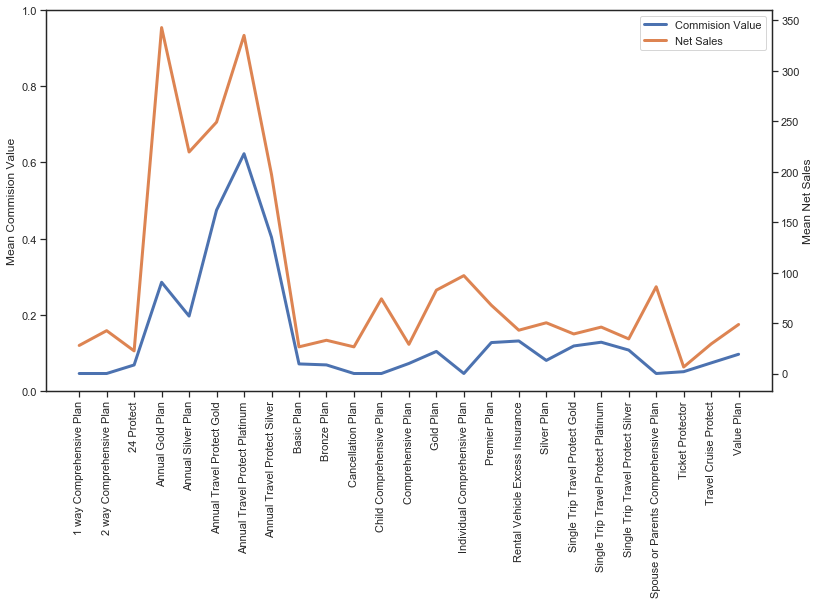

In [70]:
net_table1=pd.crosstab(dataset_train["Product Name"],dataset_train["Claim"])
net_table1['Mean Net Sales']=dataset_train.groupby('Product Name')['Net Sales'].mean()
net_table1

newtable1=pd.crosstab(dataset_train["Product Name"],dataset_train["Claim"])
newtable1['mean commision']=dataset_train.groupby('Product Name')['Commision (in value)'].mean()

fig,ax1=plt.subplots(figsize=(13,7))
plt.xticks(rotation=90)
ax1.set(ylabel="Mean Commision Value")
ax2=ax1.twinx()
sns.lineplot(newtable1.index,newtable1['mean commision'],ax=ax2,linewidth=3,markers=True,label="Commision Value")
sns.lineplot(net_table1.index,net_table1['Mean Net Sales'],ax=ax2,linewidth=3,markers=True,label="Net Sales")

### Countries like United State, United Kingdom, Singapore, Australia has great Net Sales, producing corresponding better Commision.

Claim,0,1,Mean Net Sales
Destination,,,
SINGAPORE,10158,450,58.432792
CHINA,3802,34,34.867401
UNITED STATES,1988,30,77.061670
THAILAND,4670,29,25.319696
AUSTRALIA,2906,28,48.021677
MALAYSIA,4726,21,20.957590
HONG KONG,1927,15,28.688903
UNITED KINGDOM,1027,13,62.834183
"KOREA, REPUBLIC OF",1169,13,41.279357


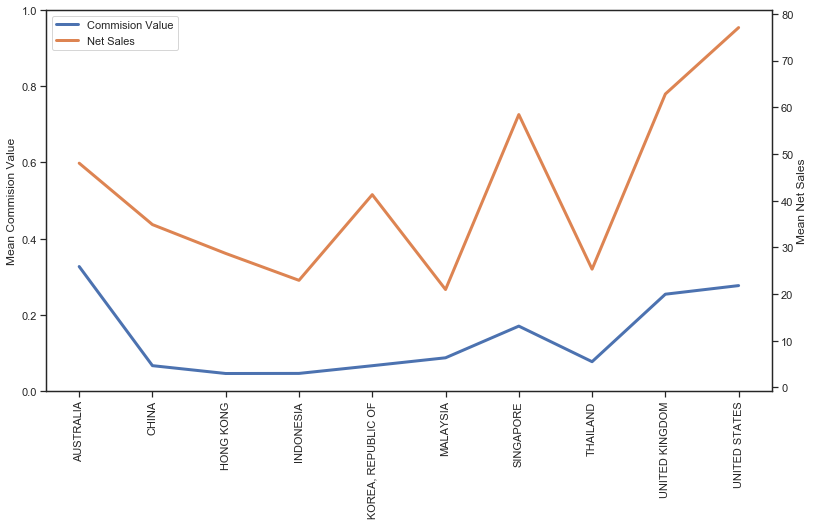

In [67]:
fig,ax1=plt.subplots(figsize=(13,7))
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax1.set(ylabel="Mean Commision Value")
sns.lineplot(table6.index,table6['mean commision'],ax=ax2,linewidth=3,legend='full',label="Commision Value")
sns.lineplot(net_table2.index,net_table2['Mean Net Sales'],ax=ax2,linewidth=3,legend='full',label="Net Sales")

net_table2

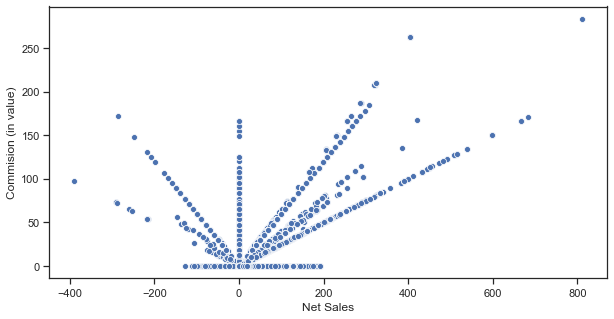

In [69]:
plt.figure(figsize=(10, 5))
sns.scatterplot(dataset_train['Net Sales'],dataset_train["Commision (in value)"])

In [10]:
categorical = dataset_train.select_dtypes(exclude=np.number)
numerical = dataset_train.select_dtypes(include=np.number)

In [11]:
numerical.head()

,Claim,Duration,Net Sales,Commision (in value),Age
0,0,7,0.0,17.82,31
1,0,85,69.0,0.00,36
2,0,11,19.8,11.88,75
3,0,16,20.0,0.00,32
4,0,10,15.0,0.00,29


In [12]:
categorical.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,Not Present
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,Not Present
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,Not Present
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA,Not Present
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF",Not Present


In [13]:
#concatenating "Claim" into categorical column of the dataset
categorical=pd.concat([categorical,numerical["Claim"]],1)

### "Duration" column has some negative vaues which can't be possible, so Let's replace nagtive values with the mean value of "Duration" column

In [14]:
dataset_train.loc[dataset_train["Duration"]<0,"Duration"]=dataset_train["Duration"].mean()

### There are few instances where "Commision" is high when "Net Sales" is zero or low which can't be possible logically. As we can't gain high commison unless we sale something. Replacing Commision value with "0 (zero)" where Net sales are "0 (zero)"

In [15]:
dataset_train.loc[dataset_train["Net Sales"]==0,'Commision (in value)']=0.0

In [16]:
#Function to calculate Correlation of categorcial variables using Cramer's V method
def cramers_v_correlation(col1, col2):
    matrix = pd.crosstab(dataset_train[col1],dataset_train[col2])
    chi2 = ss.chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    phi2 = chi2/n
    r,k = matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [17]:
for col_1 in list(categorical):
    for col_2 in list(categorical):
        if((cramers_v_correlation(col_1,col_2)>0.8) and (col_1!=col_2)):
            print(col_1,"to",col_2,"correlation is",cramers_v_correlation(col_1,col_2))

Agency to Agency Type correlation is 0.9998615163948056
Agency to Distribution Channel correlation is 0.9512410165152818
Agency Type to Agency correlation is 0.9998615163948056
Agency Type to Product Name correlation is 0.9889657680364865
Agency Type to Gender correlation is 0.8654383804749617
Distribution Channel to Agency correlation is 0.9512410165152818
Distribution Channel to Product Name correlation is 0.943863560944548
Product Name to Agency Type correlation is 0.9889657680364865
Product Name to Distribution Channel correlation is 0.943863560944548
Gender to Agency Type correlation is 0.8654383804749617


### Chi-square test for feature importance

In [18]:
#Function to calculate importance of features using Chi-Square test
def Chi_square(col_1,col_2):
    X=dataset_train[col_1].astype('str')
    Y=dataset_train[col_2].astype('str')
    observed_values=pd.crosstab(Y,X)
    chi2, p, dof, expected = ss.chi2_contingency(observed_values)
    if(p>0.05):
        print(col_1," is not required")
    else:
        print(col_1," is required")

In [19]:
for col in list(dataset_train):
    Chi_square(col,"Claim")

Agency  is required
Agency Type  is required
Distribution Channel  is not required
Product Name  is required
Claim  is required
Duration  is required
Destination  is required
Net Sales  is required
Commision (in value)  is required
Gender  is required
Age  is required


#### We can remove "Agency Type" to avoid Multicollinearity and "Distribution Channel" as its is not importnat as per Chi-Square test


In [20]:
#dropping columns which are not required
dataset_train.drop(["Distribution Channel",'Agency Type'],1,inplace=True)

In [21]:
#Performing One-Hot encoding on dataset
dummy_dataset_train=pd.get_dummies(dataset_train)

In [22]:
dummy_dataset_train.head()

,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Gender_F,Gender_M,Gender_Not Present
0,0,7.0,0.0,0.00,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,85.0,69.0,0.00,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,11.0,19.8,11.88,75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,16.0,20.0,0.00,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,10.0,15.0,0.00,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
dummy_dataset_train=dummy_dataset_train.drop(["Agency_ADM","Product Name_1 way Comprehensive Plan","Destination_ARGENTINA","Gender_F"],1)

In [24]:
scaler=StandardScaler()
dummy_train_scaled=pd.DataFrame(scaler.fit_transform(dummy_dataset_train),columns=list(dummy_dataset_train))

In [25]:
dummy_train_scaled.head()

,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Gender_M,Gender_Not Present
0,-0.121967,-0.418296,-0.834389,-0.474719,-0.640165,-0.07355,-0.388551,-0.040061,-0.055993,-0.036701,...,-0.065506,-0.14493,-0.203907,-0.013344,-0.008896,-0.008896,-0.166083,-0.00629,-0.418259,0.637249
1,-0.121967,0.350685,0.576677,-0.474719,-0.284961,-0.07355,-0.388551,-0.040061,-0.055993,-0.036701,...,-0.065506,-0.14493,-0.203907,-0.013344,-0.008896,-0.008896,-0.166083,-0.00629,-0.418259,0.637249
2,-0.121967,-0.378861,-0.429475,0.135019,2.485628,-0.07355,-0.388551,-0.040061,-0.055993,-0.036701,...,-0.065506,-0.14493,-0.203907,-0.013344,-0.008896,-0.008896,-0.166083,-0.00629,-0.418259,0.637249
3,-0.121967,-0.329567,-0.425385,-0.474719,-0.569124,-0.07355,-0.388551,-0.040061,-0.055993,-0.036701,...,-0.065506,-0.14493,-0.203907,-0.013344,-0.008896,-0.008896,-0.166083,-0.00629,-0.418259,0.637249
4,-0.121967,-0.388720,-0.527636,-0.474719,-0.782247,-0.07355,-0.388551,-0.040061,-0.055993,-0.036701,...,-0.065506,-0.14493,-0.203907,-0.013344,-0.008896,-0.008896,-0.166083,-0.00629,-0.418259,0.637249


In [28]:
x=dummy_train_scaled.drop(["Claim"],1)
y=dataset_train['Claim']

In [30]:
#Function to perform Backward Elimination
import statsmodels.api as sm
cols = list(x.columns)
pmax = 1
while (pmax>0.05):
    p=[]
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        breakselected_features_BE = cols
print("Best features using Backward Elimination: ",cols)

Best features using Backward Elimination:  ['Net Sales', 'Commision (in value)', 'Agency_C2B', 'Agency_LWC', 'Product Name_2 way Comprehensive Plan', 'Product Name_Annual Travel Protect Gold', 'Product Name_Annual Travel Protect Silver', 'Product Name_Bronze Plan', 'Product Name_Gold Plan', 'Product Name_Individual Comprehensive Plan', 'Product Name_Silver Plan', 'Product Name_Single Trip Travel Protect Gold', 'Product Name_Single Trip Travel Protect Platinum', 'Product Name_Single Trip Travel Protect Silver', 'Product Name_Spouse or Parents Comprehensive Plan']


In [32]:
#Sorting out target column and important features selected using feature selection method
new_X=dummy_train_scaled[cols]
new_y=dataset_train["Claim"]

In [33]:
#Checking data imbalance 
new_y.value_counts()/dataset_train.shape[0]*100

0    98.534212
1     1.465788
Name: Claim, dtype: float64

#### Dataset contains huge Data imbalance, applying SMOTE to remove Data imbalance

In [34]:
#Intializing SMOTE 
sm=SMOTE(random_state=0)

In [35]:
#Removing Data imbalance using SMOTE 
sm_X,sm_y=sm.fit_sample(new_X,new_y)

In [36]:
#Checking for Data imbalance again
pd.Series(sm_y).value_counts()

1    49812
0    49812
dtype: int64

In [37]:
#Performing Train-Test split
X_train,X_test,y_train,y_test=tts(sm_X,sm_y,test_size=0.3,random_state=0)

In [38]:
pd.Series(y_test).value_counts()

1    15065
0    14823
dtype: int64

In [39]:
#Intializing Simple Logistic Regression Model
logreg=LogisticRegression()

In [40]:
#Fitting Logistic Regression Model on Train set
logreg.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
#Performing prediction on test set
y_pred=logreg.predict(X_test)

In [42]:
#Calculating Accuracy score
accuracy_score(y_test,y_pred)

0.75719352248394

In [43]:
#Printing Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77     14823
           1       0.81      0.68      0.74     15065

    accuracy                           0.76     29888
   macro avg       0.76      0.76      0.76     29888
weighted avg       0.76      0.76      0.76     29888



In [44]:
roc_auc_score(y_test,y_pred)

0.7578280956127531

In [45]:
def curve_roc(model,X_test,y_test):
    probs=model.predict_proba(X_test)
    probs = probs[:, 1]
    probs.shape
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.show()

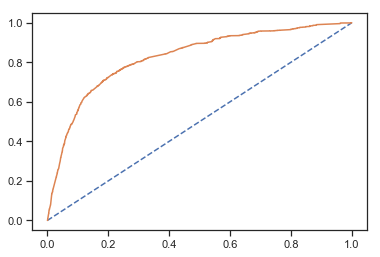

In [46]:
curve_roc(logreg,X_test,y_test)

### Precision and Recall looks descent 

### Performing Hyper Parameter tunning and Cross-validation using GridSearchCV

In [47]:
#Defining parameters for GridSearchCV
logreg_param={"C":np.arange(0.01,1,0.01),
             "penalty":['l1','l2']}

In [48]:
#Initializing GridSearchCV with 5 Fold Cross validation 
logreg_cv=GridSearchCV(estimator=logreg,param_grid=logreg_param,cv=5)

In [49]:
#Fitting GridSearchCV model on Train Set
logreg_cv.fit(sm_X,sm_y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.01, 0.02...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,


In [50]:
#Best Estimator after GridSearchCV
logreg_cv.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Performing prediction on Test set using best estimator
y_pred_cv=logreg_cv.best_estimator_.predict(X_test)

In [52]:
#Accuracy Score for best estimator
accuracy_score(y_test,y_pred_cv)

0.7570596895074947

In [53]:
#Classification Report for Best Estimator
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77     14823
           1       0.81      0.68      0.74     15065

    accuracy                           0.76     29888
   macro avg       0.76      0.76      0.76     29888
weighted avg       0.76      0.76      0.76     29888



In [54]:
roc_auc_score(y_test,y_pred_cv)

0.7576899190512212

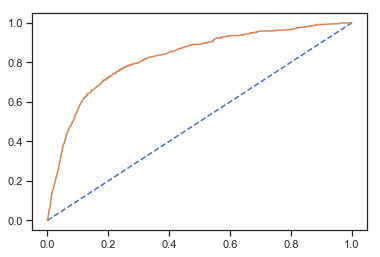

In [55]:
curve_roc(logreg_cv,X_test,y_test)

In [56]:
feature_importance=list(logreg_cv.best_estimator_.coef_.T)
features=list(cols)
f_imp= pd.DataFrame(list(zip(features,feature_importance)), columns =['Features', 'Importance']) 
f_imp.sort_values(by="Importance",ascending=False)

,Features,Importance
1,Commision (in value),[0.4267216355360282]
4,Product Name_2 way Comprehensive Plan,[0.40035666073203163]
11,Product Name_Single Trip Travel Protect Gold,[0.3600255808752404]
2,Agency_C2B,[0.3558040318104405]
7,Product Name_Bronze Plan,[0.3497550742351781]
0,Net Sales,[0.2984978412523403]
10,Product Name_Silver Plan,[0.27495328825514403]
13,Product Name_Single Trip Travel Protect Silver,[0.2487146258726724]
12,Product Name_Single Trip Travel Protect Platinum,[0.23540270619289563]
5,Product Name_Annual Travel Protect Gold,[0.13962576912708677]


In [57]:
feature_importance=list(logreg.coef_.T)
features=list(cols)
f_imp= pd.DataFrame(list(zip(features,feature_importance)), columns =['Features', 'Importance']) 
f_imp.sort_values(by="Importance",ascending=False)

,Features,Importance
1,Commision (in value),[0.45598736684626706]
11,Product Name_Single Trip Travel Protect Gold,[0.41467124242545084]
4,Product Name_2 way Comprehensive Plan,[0.4140137122599726]
7,Product Name_Bronze Plan,[0.35952280548166704]
2,Agency_C2B,[0.3411788560153176]
0,Net Sales,[0.2964954787826242]
13,Product Name_Single Trip Travel Protect Silver,[0.29221372539727103]
10,Product Name_Silver Plan,[0.28739448961041447]
12,Product Name_Single Trip Travel Protect Platinum,[0.26917722034526187]
5,Product Name_Annual Travel Protect Gold,[0.17009054044367458]


In [59]:
#Importing Test Dataset
dataset_test=pd.read_csv("Ins_Claims_test.csv")
dataset_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,NaN,47
1,19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,NaN,24
2,43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,NaN,36
3,48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,NaN,36
4,52318,EPX,Travel Agency,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,NaN,36


In [61]:
#Dropping unwanted columns
dataset_test=dataset_test.drop(["Distribution Channel","Agency Type","ID"],1)

In [62]:
#One-Hot encoding Test set
new_test=pd.get_dummies(dataset_test)

In [63]:
#Intializing test set with same column
new_test=new_test[cols]

In [64]:
#Final prediction for submission
final_predict=logreg_cv.best_estimator_.predict(new_test)

In [65]:
le=LabelEncoder()

In [66]:
dataset_train_copy = pd.read_csv("Ins_Claims_train.csv")

In [67]:
dataset_train_copy['Gender']=dataset_train_copy['Gender'].fillna("Not Present")

In [68]:
def encode(col):
    dataset_train_copy[col]=le.fit_transform(dataset_train_copy[col])

In [69]:
encode("Agency")
encode("Agency Type")
encode("Distribution Channel")
encode("Product Name")
encode("Destination")
encode("Gender")

In [70]:
rfc=RandomForestClassifier(random_state=0,oob_score=True)

In [71]:
sm=SMOTE(random_state=0)

In [73]:
X=dataset_train_copy.drop(["Claim"],1)
y=dataset_train_copy["Claim"]

In [74]:
X_new,y_new=sm.fit_sample(X,y.ravel())

In [75]:
X_train,X_test,y_train,y_test=tts(X_new,y_new,test_size=0.3,random_state=0)

In [76]:
rfc.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
y_pred_rfc=rfc.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred_rfc)

0.9867170770877944

In [79]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14823
           1       0.99      0.98      0.99     15065

    accuracy                           0.99     29888
   macro avg       0.99      0.99      0.99     29888
weighted avg       0.99      0.99      0.99     29888



In [80]:
roc_auc_score(y_test,y_pred_rfc)

0.9867598252363843

In [81]:
rfc.oob_score_

0.975493288975565

In [82]:
dt=DecisionTreeClassifier(criterion='entropy')

In [83]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
y_pred_dt=dt.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred_dt)

0.9796908458244111

In [86]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14823
           1       0.98      0.98      0.98     15065

    accuracy                           0.98     29888
   macro avg       0.98      0.98      0.98     29888
weighted avg       0.98      0.98      0.98     29888



In [87]:
roc_auc_score(y_test,y_pred_dt)

0.9796551067168313